In [1]:
import pandas as pd
from Bio import SeqIO
import seaborn as sns
from codon_counter import *
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("Shigella_mutants-proteomics_results-run2.xlsx")
df.head()


,protein_id,gene_name,description,comparison,log2_fc,p_value,adj_p_value,significant
0,QCC34454.1,icsP,omptin family outer membrane protease IcsP,mnmE-WT,-1.340949,9.049053e-11,1.948261e-07,True
1,QCC32881.1,panB,3-methyl-2-oxobutanoate hydroxymethyltransferase,mnmE-WT,-1.309781,3.029777e-10,2.605178e-07,True
2,QCC34427.1,EKN05_024790,invasin IpaA,mnmE-WT,-1.508884,4.387052e-10,2.605178e-07,True
3,QCC31329.1,yedE,selenium metabolism membrane protein YedE/FdhT,mnmE-WT,1.862296,4.840089e-10,2.605178e-07,True
4,QCC33432.1,pyrE,orotate phosphoribosyltransferase,mnmE-WT,-1.332021,1.547091e-09,6.661772e-07,True


In [3]:
chromosome =  next(SeqIO.parse("CP037923.1.txt", "embl"))
plasmid = next(SeqIO.parse("CP037924.1.txt", "embl"))

r_counts = make_aa_dict(chromosome, 'AGA')
r_counts.update(make_aa_dict(plasmid, 'AGA'))
aga_counts = make_codon_dict(chromosome, 'AGA')
aga_counts.update(make_codon_dict(plasmid, 'AGA'))
agg_counts = make_codon_dict(chromosome, 'AGG')
agg_counts.update(make_codon_dict(plasmid, 'AGG'))

l_counts = make_aa_dict(chromosome, 'UUA')
l_counts.update(make_aa_dict(plasmid, 'UUA'))
uua_counts = make_codon_dict(chromosome, 'UUA')
uua_counts.update(make_codon_dict(plasmid, 'UUA'))
uug_counts = make_codon_dict(chromosome, 'UUG')
uug_counts.update(make_codon_dict(plasmid, 'UUG'))

v_counts = make_aa_dict(chromosome, 'GUA')
v_counts.update(make_aa_dict(plasmid, 'GUA'))
gua_counts = make_codon_dict(chromosome, 'GUA')
gua_counts.update(make_codon_dict(plasmid, 'GUA'))
gug_counts = make_codon_dict(chromosome, 'GUG')
gug_counts.update(make_codon_dict(plasmid, 'GUG'))

g_counts = make_aa_dict(chromosome, 'GGA')
g_counts.update(make_aa_dict(plasmid, 'GGA'))
gga_counts = make_codon_dict(chromosome, 'GGA')
gga_counts.update(make_codon_dict(plasmid, 'GGA'))
ggg_counts = make_codon_dict(chromosome, 'GGG')
ggg_counts.update(make_codon_dict(plasmid, 'GGG'))

q_counts = make_aa_dict(chromosome, 'CAA')
q_counts.update(make_aa_dict(plasmid, 'CAA'))
caa_counts = make_codon_dict(chromosome, 'CAA')
caa_counts.update(make_codon_dict(plasmid, 'CAA'))
cag_counts = make_codon_dict(chromosome, 'CAG')
cag_counts.update(make_codon_dict(plasmid, 'CAG'))

k_counts = make_aa_dict(chromosome, 'AAA')
k_counts.update(make_aa_dict(plasmid, 'AAA'))
aaa_counts = make_codon_dict(chromosome, 'AAA')
aaa_counts.update(make_codon_dict(plasmid, 'AAA'))
aag_counts = make_codon_dict(chromosome, 'AAG')
aag_counts.update(make_codon_dict(plasmid, 'AAG'))

e_counts = make_aa_dict(chromosome, 'GAA')
e_counts.update(make_aa_dict(plasmid, 'GAA'))
gaa_counts = make_codon_dict(chromosome, 'GAA')
gaa_counts.update(make_codon_dict(plasmid, 'GAA'))
gag_counts = make_codon_dict(chromosome, 'GAG')
gag_counts.update(make_codon_dict(plasmid, 'GAG'))

source_dict = make_source_dict(chromosome, 'chromosome')
source_dict.update(make_source_dict(plasmid, 'plasmid'))

In [4]:
df['source'] = df['protein_id'].map(source_dict)
df['significant'] = df['adj_p_value'].le(0.01) & (df['log2_fc'].le(-0.5) | df['log2_fc'].ge(0.5))

df['R_count'] = df['protein_id'].map(r_counts)
df['AGA_count'] = df['protein_id'].map(aga_counts)
df['AGA_fraction'] = df['AGA_count']/df['R_count']
df['AGG_count'] = df['protein_id'].map(agg_counts)
df['AGG_fraction'] = df['AGG_count']/df['R_count']

df['L_count'] = df['protein_id'].map(l_counts)
df['UUA_count'] = df['protein_id'].map(uua_counts)
df['UUA_fraction'] = df['UUA_count']/df['L_count']
df['UUG_count'] = df['protein_id'].map(uug_counts)
df['UUG_fraction'] = df['UUA_count']/df['L_count']

df['V_count'] = df['protein_id'].map(v_counts)
df['GUA_count'] = df['protein_id'].map(gua_counts)
df['GUA_fraction'] = df['GUA_count']/df['V_count']
df['GUG_count'] = df['protein_id'].map(gug_counts)
df['GUG_fraction'] = df['GUG_count']/df['V_count']

df['G_count'] = df['protein_id'].map(g_counts)
df['GGA_count'] = df['protein_id'].map(gga_counts)
df['GGA_fraction'] = df['GGA_count']/df['G_count']
df['GGG_count'] = df['protein_id'].map(ggg_counts)
df['GGG_fraction'] = df['GGG_count']/df['G_count']

df['Q_count'] = df['protein_id'].map(q_counts)
df['CAA_count'] = df['protein_id'].map(caa_counts)
df['CAA_fraction'] = df['CAA_count']/df['Q_count']
df['CAG_count'] = df['protein_id'].map(cag_counts)
df['CAG_fraction'] = df['CAG_count']/df['Q_count']

df['K_count'] = df['protein_id'].map(k_counts)
df['AAA_count'] = df['protein_id'].map(aaa_counts)
df['AAA_fraction'] = df['AAA_count']/df['K_count']
df['AAG_count'] = df['protein_id'].map(aag_counts)
df['AAG_fraction'] = df['AAG_count']/df['K_count']

df['E_count'] = df['protein_id'].map(e_counts)
df['GAA_count'] = df['protein_id'].map(gaa_counts)
df['GAA_fraction'] = df['GAA_count']/df['E_count']
df['GAG_count'] = df['protein_id'].map(gag_counts)
df['GAG_fraction'] = df['GAG_count']/df['E_count']

df = df.fillna(0)
df

,protein_id,gene_name,description,comparison,log2_fc,p_value,adj_p_value,significant,source,R_count,...,K_count,AAA_count,AAA_fraction,AAG_count,AAG_fraction,E_count,GAA_count,GAA_fraction,GAG_count,GAG_fraction
0,QCC34454.1,icsP,omptin family outer membrane protease IcsP,mnmE-WT,-1.340949,9.049053e-11,1.948261e-07,True,plasmid,10,...,25,22,0.880000,3,0.120000,15,9,0.600000,6,0.400000
1,QCC32881.1,panB,3-methyl-2-oxobutanoate hydroxymethyltransferase,mnmE-WT,-1.309781,3.029777e-10,2.605178e-07,True,chromosome,10,...,12,10,0.833333,2,0.166667,17,13,0.764706,4,0.235294
2,QCC34427.1,EKN05_024790,invasin IpaA,mnmE-WT,-1.508884,4.387052e-10,2.605178e-07,True,plasmid,21,...,50,38,0.760000,12,0.240000,35,28,0.800000,7,0.200000
3,QCC31329.1,yedE,selenium metabolism membrane protein YedE/FdhT,mnmE-WT,1.862296,4.840089e-10,2.605178e-07,True,chromosome,20,...,14,13,0.928571,1,0.071429,11,8,0.727273,3,0.272727
4,QCC33432.1,pyrE,orotate phosphoribosyltransferase,mnmE-WT,-1.332021,1.547091e-09,6.661772e-07,True,chromosome,12,...,13,9,0.692308,4,0.307692,18,9,0.500000,9,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,QCC32977.1,rpsT,30S ribosomal protein S20,yejB-WT,0.000099,9.982538e-01,9.988563e-01,False,chromosome,7,...,14,8,0.571429,6,0.428571,3,3,1.000000,0,0.000000
10761,QCC32417.1,nagD,ribonucleotide monophosphatase NagD,yejB-WT,-0.000070,9.983597e-01,9.988563e-01,False,chromosome,10,...,10,8,0.800000,2,0.200000,10,8,0.800000,2,0.200000
10762,QCC33446.1,EKN05_019550,AsmA family protein,yejB-WT,-0.000061,9.983744e-01,9.988563e-01,False,chromosome,29,...,17,13,0.764706,4,0.235294,23,19,0.826087,4,0.173913
10763,QCC33749.1,arsR,arsenical resistance operon transcriptionalreg...,yejB-WT,0.000057,9.988470e-01,9.988563e-01,False,chromosome,8,...,7,2,0.285714,5,0.714286,7,6,0.857143,1,0.142857


In [5]:
print(df.comparison.unique(), df.source.unique())




#print(len(mnmE_df.protein_id.unique()), len(mnmE_df.comparison))
#df2[df2.protein_id.duplicated(keep=False)]

['mnmE-WT' 'mnmG-WT' 'pcnB-WT' 'virF-WT' 'yejB-WT'] ['plasmid' 'chromosome']


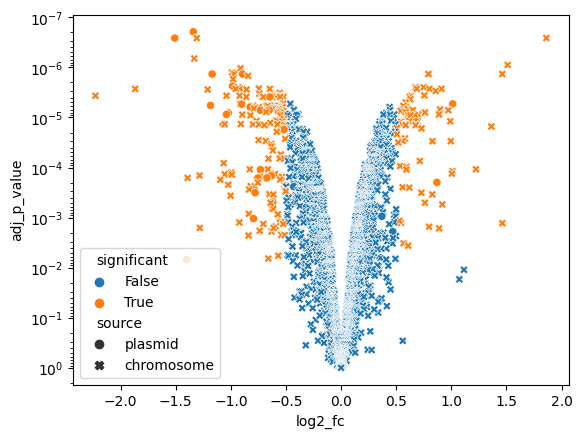

<Axes: xlabel='log2_fc', ylabel='AGA_fraction'>

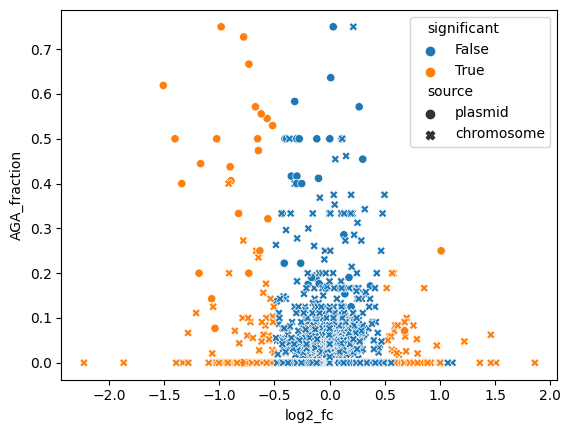

In [88]:
g = sns.scatterplot(data = df.loc[df['comparison'] == 'mnmE-WT'],x="log2_fc",y="adj_p_value", hue="significant", style='source')
plt.yscale('log', base=10)
g.invert_yaxis()
plt.show()

sns.scatterplot(data = df.loc[df['comparison'] == 'mnmE-WT'],x="log2_fc",y="AGA_fraction", hue="significant", style='source')


In [6]:
a_counts = make_aa_dict(chromosome, 'GCU')
a_counts.update(make_aa_dict(plasmid, 'GCU'))
gcu_counts = make_codon_dict(chromosome, 'GCU')
gcu_counts.update(make_codon_dict(plasmid, 'GCU'))

df['A_count'] = df['protein_id'].map(a_counts)
df['GCU_count'] = df['protein_id'].map(gcu_counts)
df['GCU_fraction'] = df['GCU_count']/df['A_count']

df = df.fillna(0)
df

,protein_id,gene_name,description,comparison,log2_fc,p_value,adj_p_value,significant,source,R_count,...,AAG_count,AAG_fraction,E_count,GAA_count,GAA_fraction,GAG_count,GAG_fraction,A_count,GCU_count,GCU_fraction
0,QCC34454.1,icsP,omptin family outer membrane protease IcsP,mnmE-WT,-1.340949,9.049053e-11,1.948261e-07,True,plasmid,10,...,3,0.120000,15,9,0.600000,6,0.400000,16,4,0.250000
1,QCC32881.1,panB,3-methyl-2-oxobutanoate hydroxymethyltransferase,mnmE-WT,-1.309781,3.029777e-10,2.605178e-07,True,chromosome,10,...,2,0.166667,17,13,0.764706,4,0.235294,35,8,0.228571
2,QCC34427.1,EKN05_024790,invasin IpaA,mnmE-WT,-1.508884,4.387052e-10,2.605178e-07,True,plasmid,21,...,12,0.240000,35,28,0.800000,7,0.200000,35,7,0.200000
3,QCC31329.1,yedE,selenium metabolism membrane protein YedE/FdhT,mnmE-WT,1.862296,4.840089e-10,2.605178e-07,True,chromosome,20,...,1,0.071429,11,8,0.727273,3,0.272727,47,7,0.148936
4,QCC33432.1,pyrE,orotate phosphoribosyltransferase,mnmE-WT,-1.332021,1.547091e-09,6.661772e-07,True,chromosome,12,...,4,0.307692,18,9,0.500000,9,0.500000,23,4,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,QCC32977.1,rpsT,30S ribosomal protein S20,yejB-WT,0.000099,9.982538e-01,9.988563e-01,False,chromosome,7,...,6,0.428571,3,3,1.000000,0,0.000000,19,12,0.631579
10761,QCC32417.1,nagD,ribonucleotide monophosphatase NagD,yejB-WT,-0.000070,9.983597e-01,9.988563e-01,False,chromosome,10,...,2,0.200000,10,8,0.800000,2,0.200000,26,3,0.115385
10762,QCC33446.1,EKN05_019550,AsmA family protein,yejB-WT,-0.000061,9.983744e-01,9.988563e-01,False,chromosome,29,...,4,0.235294,23,19,0.826087,4,0.173913,52,3,0.057692
10763,QCC33749.1,arsR,arsenical resistance operon transcriptionalreg...,yejB-WT,0.000057,9.988470e-01,9.988563e-01,False,chromosome,8,...,5,0.714286,7,6,0.857143,1,0.142857,9,1,0.111111


<Axes: xlabel='log2_fc', ylabel='AGA_fraction'>

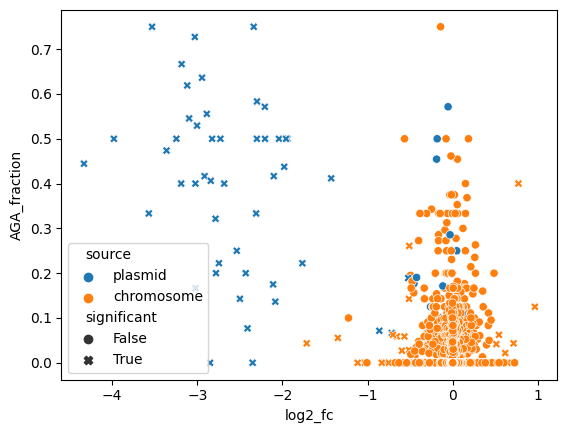

In [7]:
sns.scatterplot(data = df.loc[df['comparison'] == 'virF-WT'],x="log2_fc",y="AGA_fraction", hue="source", style='significant')



<Axes: xlabel='log2_fc', ylabel='CAU_fraction'>

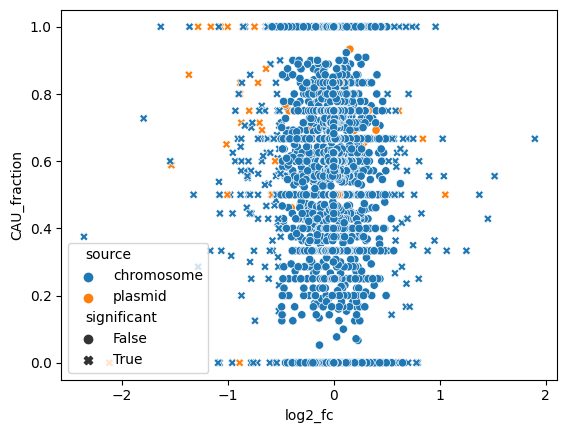

In [8]:
h_counts = make_aa_dict(chromosome, 'CAU')
h_counts.update(make_aa_dict(plasmid, 'CAU'))
cau_counts = make_codon_dict(chromosome, 'CAU')
cau_counts.update(make_codon_dict(plasmid, 'CAU'))

df['H_count'] = df['protein_id'].map(h_counts)
df['CAU_count'] = df['protein_id'].map(cau_counts)
df['CAU_fraction'] = df['CAU_count']/df['H_count']

df = df.fillna(0)
sns.scatterplot(data = df.loc[df['comparison'] == 'mnmG-WT'],x="log2_fc",y="CAU_fraction", hue="source", style='significant')


In [77]:
for comp in ['mnmE-WT', 'mnmG-WT', 'pcnB-WT', 'virF-WT', 'yejB-WT']:
    for src in ['plasmid','chromosome']:
        tmp_df = df.loc[df['source'] == src]
        tmp_df = tmp_df.loc[tmp_df['comparison'] == comp]
        fname = src + '_' + comp + '_codon_counts.xlsx'
        tmp_df.to_excel(fname)

In [19]:
plasmid_codons = relative_codon_count(codon_counter(plasmid))
chromosome_codons = relative_codon_count(codon_counter(chromosome))
table_11 = CodonTable.unambiguous_rna_by_id[11] #Table 11 Bacterial, Archaeal, Plant Plastid
bact_table = table_11.forward_table
for codon in table_11.stop_codons:
    bact_table[str(codon)] = 'STOP'
        
syn_plasmid_codons = synonymus_codon_counts(codon_counter(plasmid), bact_table)
syn_chromosome_codons = synonymus_codon_counts(codon_counter(chromosome), bact_table)

norm_syn_plasmid = normalized_codon_usage(syn_plasmid_codons)
norm_syn_chromosome = normalized_codon_usage(syn_chromosome_codons)

In [23]:
print("AA, codon, per_1k_plasmid, per_1k_chromosome, count_plasmid, count_chromosome, rel_freq_plasmid, rel_freq_chromosome")
for codon in sorted(chromosome_codons.keys()):
    #print(norm_syn_plasmid[bact_table[codon]][codon])
    print(bact_table[codon], codon,
          round(plasmid_codons[codon][0],2), round(chromosome_codons[codon][0],2),
          plasmid_codons[codon][1], chromosome_codons[codon][1],
          norm_syn_plasmid[bact_table[codon]][codon], norm_syn_chromosome[bact_table[codon]][codon]
          ,sep=", ")

AA, codon, per_1k_plasmid, per_1k_chromosome, count_plasmid, count_chromosome, rel_freq_plasmid, rel_freq_chromosome
K, AAA, 44.68, 34.05, 2080, 40110, 0.73, 0.76
N, AAC, 18.32, 21.5, 853, 25327, 0.34, 0.56
K, AAG, 16.13, 10.71, 751, 12616, 0.27, 0.24
N, AAU, 35.7, 17.0, 1662, 20020, 0.66, 0.44
T, ACA, 17.44, 7.06, 812, 8314, 0.33, 0.13
T, ACC, 11.73, 22.74, 546, 26790, 0.22, 0.43
T, ACG, 10.87, 14.59, 506, 17184, 0.21, 0.27
T, ACU, 12.82, 8.79, 597, 10350, 0.24, 0.17
R, AGA, 11.75, 2.41, 547, 2836, 0.19, 0.04
S, AGC, 12.29, 15.89, 572, 18712, 0.16, 0.28
R, AGG, 6.77, 1.53, 315, 1798, 0.11, 0.03
S, AGU, 15.29, 8.67, 712, 10207, 0.2, 0.15
I, AUA, 20.11, 4.31, 936, 5081, 0.32, 0.07
I, AUC, 15.53, 25.0, 723, 29449, 0.25, 0.43
M, AUG, 23.95, 28.03, 1115, 33011, 1.0, 1.0
I, AUU, 26.85, 29.16, 1250, 34344, 0.43, 0.5
Q, CAA, 15.17, 14.96, 706, 17620, 0.38, 0.34
H, CAC, 7.99, 9.73, 372, 11466, 0.33, 0.44
Q, CAG, 24.81, 29.54, 1155, 34793, 0.62, 0.66
H, CAU, 16.39, 12.63, 763, 14876, 0.67, 0.56